c:\Users\justin.widney\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


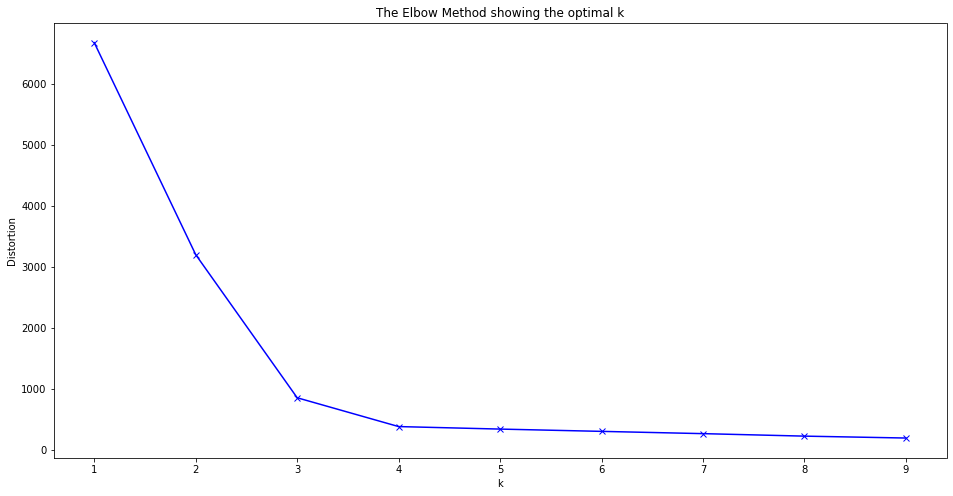

[3 1 0 1 3 1 2 2 2 0 0 1 1 2 0 3 3 2 3 3 0 3 3 2 2 0 2 3 3 1 1 2 1 3 0 0 0
 0 2 2 3 2 1 0 0 1 1 3 3 2 2 2 2 1 3 3 0 0 2 0 1 2 3 1 3 3 1 3 2 1 2 1 3 0
 1 3 1 3 1 1 2 1 0 3 0 0 0 1 0 2 2 1 0 1 0 0 0 2 3 2]


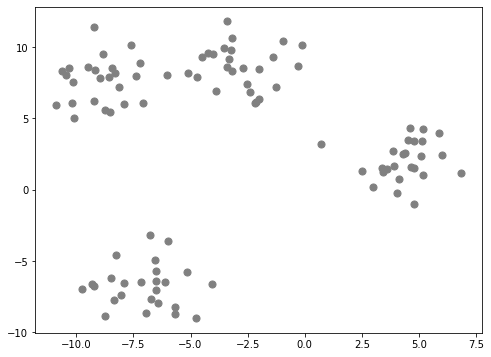

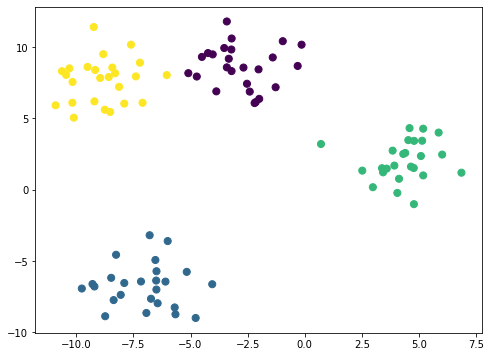

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

import os
os.environ["OMP_NUM_THREADS"] = '1'


# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

K = range(1,10)
distortions = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    distortions.append(model.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


model = KMeans(4, random_state=0)
y = model.fit_predict(X)

print(y)

# plot the input data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

[array([-8.76997   ,  6.34612239]), array([-1.40149775,  9.27133855]), array([-4.16870008,  7.21997619]), array([-7.24770937, -8.01071384])]


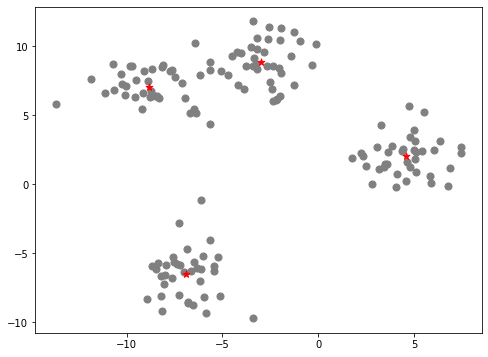

In [72]:
# LLoyds Algorithm
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import random
import math
import seaborn as sns
import matplotlib as mpl

def mean(cluster):
    average = []
    for i in range(len(cluster[0])):
        average.append(0) 
    for dimension in range(len(average)):
        for points in cluster:
            average[dimension] += points[dimension]
        average[dimension] /= len(cluster)
    return average

# initialize K Clusters randomly 

def get_rand_sites(data, clusters):
    sites = []
    initialCenters = set([])
    for i in range(clusters):
        initialCenter = random.randint(0,len(data))
        if initialCenter not in initialCenters:
            initialCenters.add(initialCenter)
            x = data[initialCenter]
            sites.append(x)
    
    print(sites)
    return sites



def lloyd(data, cluster_num, iterations, sites = None):

    global SSE
    clusters = []

    for i in range(cluster_num):
        clusters.append([])
        if sites is None:
            sites = get_rand_sites(data,cluster_num)

    for i in range(iterations): # 10 iterations will be sufficient enough for the given datasets
        #Evaluate every point in our given data set
        SSE = 0
        for point in range(len(data)):

            closestSiteNumber = 0
            closestSiteDistance = distance.euclidean(sites[0], data[point]) 

            for siteNumber in range(1,len(sites),1):
                siteDistance = distance.euclidean(sites[siteNumber], data[point])
                if siteDistance < closestSiteDistance:

                    closestSiteDistance = siteDistance
                    closestSiteNumber = siteNumber
            SSE += closestSiteDistance
            
            clusters[closestSiteNumber].append(data[point])

        for m in range(cluster_num):
            sites[m] = mean(clusters[m])
            clusters[m].clear()

    SSE = math.sqrt(SSE/len(data))
  
    return sites


# create 50 separable points
X, y = make_blobs(n_samples=150, centers=4,
                  random_state=42, cluster_std=1.5)

cluster_points = lloyd(X,4,10)

# plot the input data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

for index, point in enumerate(cluster_points):
    plt.scatter(point[0],point[1], marker='*', c='red', s=50)



In [ ]:
# LLoyds Algorithm
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import random
import math
import seaborn as sns
import matplotlib as mpl

def mean(cluster):
    average = []
    for i in range(len(cluster[0])):
        average.append(0) 
    for dimension in range(len(average)):
        for points in cluster:
            average[dimension] += points[dimension]
        average[dimension] /= len(cluster)
    return average

# initialize K Clusters randomly 

def get_rand_sites(data, clusters):
    sites = []
    initialCenters = set([])
    for i in range(clusters):
        initialCenter = random.randint(0,len(data))
        if initialCenter not in initialCenters:
            initialCenters.add(initialCenter)
            x = data[initialCenter]
            sites.append(x)
    
    print(sites)
    return sites



def lloyd(data, cluster_num, iterations, sites = None):

    global SSE
    clusters = []

    for i in range(cluster_num):
        clusters.append([])
        if sites is None:
            sites = get_rand_sites(data,cluster_num)

    for i in range(iterations): # 10 iterations will be sufficient enough for the given datasets
        #Evaluate every point in our given data set
        SSE = 0
        for point in range(len(data)):

            closestSiteNumber = 0
            closestSiteDistance = distance.euclidean(sites[0], data[point]) 

            for siteNumber in range(1,len(sites),1):
                siteDistance = distance.euclidean(sites[siteNumber], data[point])
                if siteDistance < closestSiteDistance:

                    closestSiteDistance = siteDistance
                    closestSiteNumber = siteNumber
            SSE += closestSiteDistance
            
            clusters[closestSiteNumber].append(data[point])

        for m in range(cluster_num):
            sites[m] = mean(clusters[m])
            clusters[m].clear()

    SSE = math.sqrt(SSE/len(data))
  
    return sites


# create 50 separable points
X, y = make_blobs(n_samples=150, centers=4,
                  random_state=42, cluster_std=1.5)

cluster_points = lloyd(X,4,10)

# plot the input data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

for index, point in enumerate(cluster_points):
    plt.scatter(point[0],point[1], marker='*', c='red', s=50)


{0: {'p_mean': array([-1.90911913,  5.93888839]), 'Xp': [], 'colors': 'Red'}, 1: {'p_mean': array([-1.54152403,  9.99420083]), 'Xp': [], 'colors': 'Yellow'}, 2: {'p_mean': array([ 7.45335878, -7.53546333]), 'Xp': [], 'colors': 'Green'}, 3: {'p_mean': array([8.09173418, 7.50345367]), 'Xp': [], 'colors': 'Blue'}}


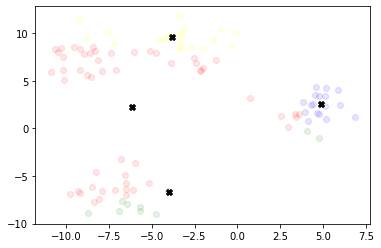

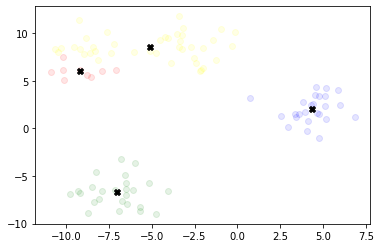

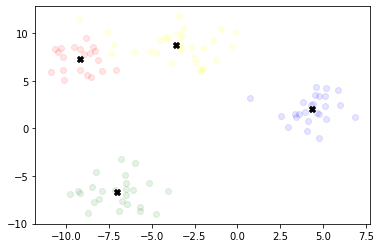

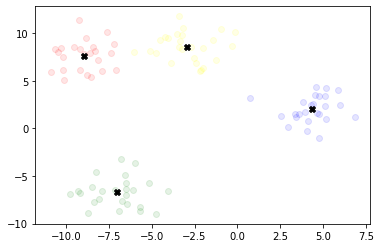

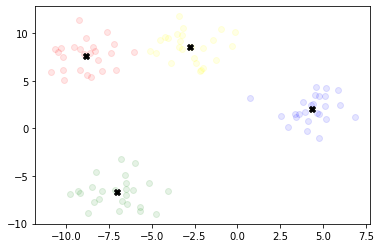

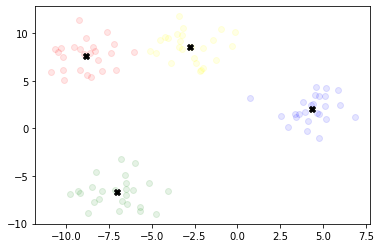

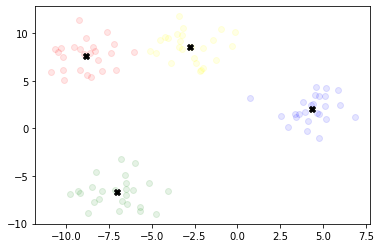

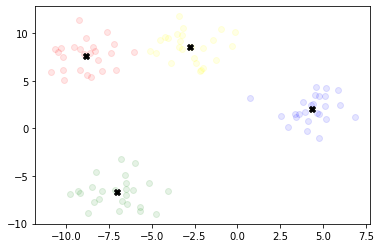

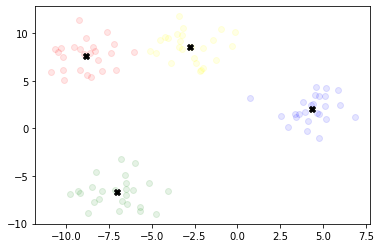

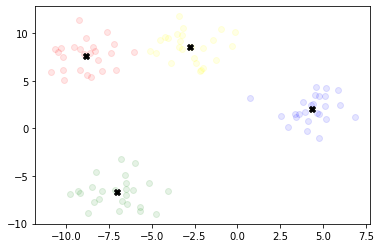

In [83]:


def euclidian(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))

# initialize K Clusters randomly
def get_rand_sites(data,  k=4):
    color=['Red','Yellow','Green','Blue']

    clusters = {}

    for i in range(k):
        p_mean = 10*(2*np.random.random((data.shape[1],))-1)
        Xp=[]
        cluster = {
            "p_mean":p_mean,
            "Xp":Xp,
            "colors":color[i]
        }
        clusters[i] = cluster

    return clusters 

def cluster_mean(clusters, k=4):
  for i in range(k):
    points = np.array(clusters[i]['Xp'])
    if points.shape[0]>0:
      next_mean = points.mean(axis=0)
      clusters[i]['p_mean'] = next_mean


def compare(clusters, k=4):

  for i in range(X.shape[0]):
    euc_dist = []
    point = X[i]
    for j in range(k):
      dist = euclidian(point,clusters[j]['p_mean'])
      euc_dist.append(dist)
    clstr = np.argmin(euc_dist)
    clusters[clstr]['Xp'].append(point)


def plotC(clusters, k=4):
  plt.figure()
  for i in range(k):
    pnts = np.array(clusters[i]['Xp'])
    try:
      plt.scatter(pnts[:,0],pnts[:,1],alpha=0.1,c=clusters[i]['colors'])
    except:
      pass
    c_cluster = clusters[i]['p_mean']
    plt.scatter(c_cluster[0],c_cluster[1],color="black",marker="X")
    clusters[i]['Xp'] = []


# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)



cluster_points = get_rand_sites(X,4)

print(cluster_points)
k = 4

for i in range(10):
  compare(cluster_points, k)
  cluster_mean(cluster_points,k)
  plotC(cluster_points ,k)


